Note: you may need to restart the kernel to use updated packages.
Directory: C:\Users\Dell
Epoch: 10
Train Loss: 0.8916, Train Accuracy: 0.6417
Test Loss: 0.9189, Test Accuracy: 0.6667
Epoch: 20
Train Loss: 0.6463, Train Accuracy: 0.8083
Test Loss: 0.7124, Test Accuracy: 0.8000
Epoch: 30
Train Loss: 0.4706, Train Accuracy: 0.8833
Test Loss: 0.5556, Test Accuracy: 0.8667
Epoch: 40
Train Loss: 0.3735, Train Accuracy: 0.8917
Test Loss: 0.4588, Test Accuracy: 0.8667
Epoch: 50
Train Loss: 0.3178, Train Accuracy: 0.9000
Test Loss: 0.4038, Test Accuracy: 0.8667
Epoch: 60
Train Loss: 0.2784, Train Accuracy: 0.9000
Test Loss: 0.3602, Test Accuracy: 0.9000
Epoch: 70
Train Loss: 0.2455, Train Accuracy: 0.9167
Test Loss: 0.3195, Test Accuracy: 0.9333
Epoch: 80
Train Loss: 0.2170, Train Accuracy: 0.9250
Test Loss: 0.2850, Test Accuracy: 0.9333
Epoch: 90
Train Loss: 0.1917, Train Accuracy: 0.9417
Test Loss: 0.2537, Test Accuracy: 0.9667
Epoch: 100
Train Loss: 0.1693, Train Accuracy: 0.9583
Test Loss

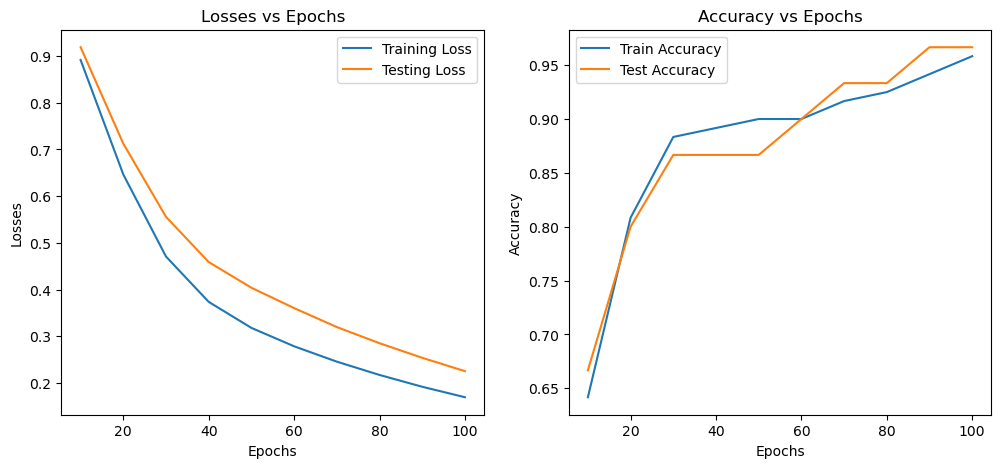

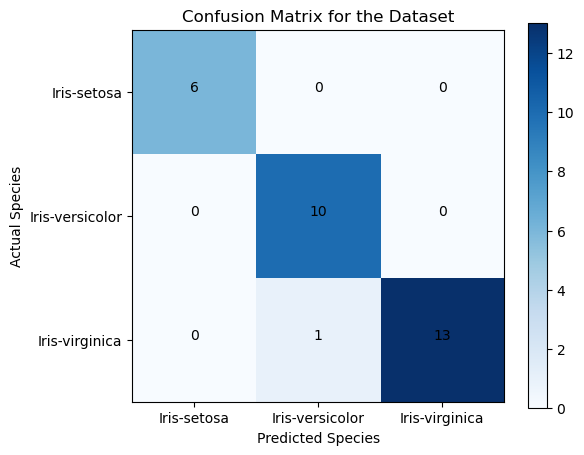

In [19]:
%pip install torch torchvision torchaudio

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
import os

file_path = r'C:\Users\Dell\Desktop\Iris Dataset\Iris.csv'
df = pd.read_csv(file_path)
print(f'Directory: {os.getcwd()}')

df.drop('Id', axis=1, inplace=True)

l = LabelEncoder()  
df['Species'] = l.fit_transform(df['Species'])

y = df['Species'].values
X = df.drop('Species', axis = 1).values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)

X_traint = torch.tensor(X_train, dtype = torch.float32)
y_traint = torch.tensor(y_train, dtype = torch.long)
X_testt = torch.tensor(X_test, dtype = torch.float32)
y_testt = torch.tensor(y_test, dtype = torch.long)

train_td = TensorDataset(X_traint, y_traint)
test_td = TensorDataset(X_testt, y_testt)
train_dl = DataLoader(train_td, batch_size=16, shuffle = True)
test_dl = DataLoader(test_td, batch_size=16)

class IrisNet(nn.Module):
    def __init__(self):
        super(IrisNet, self).__init__()
        self.hidden = nn.Linear(4, 16)
        self.output = nn.Linear(16, 3)
        self.relu = nn.ReLU()
    
    def forward(self, a):
        a = self.relu(self.hidden(a))
        return self.output(a)

mymodel = IrisNet()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(mymodel.parameters(), lr = 0.001)

trainloss = []
testloss = []
trainaccurate = []
testaccurate = []

def accuracy(preds, labels):
    return (preds.argmax(dim = 1) == labels).float().mean().item()

for i in range(1, 101):
    mymodel.train()
    for xbatch, ybatch in train_dl:
        optimizer.zero_grad()
        output = mymodel(xbatch)
        loss = loss_fn(output, ybatch)
        loss.backward()
        optimizer.step()

    if i % 10 == 0:
        mymodel.eval()
        with torch.no_grad():
            trainoutput = mymodel(X_traint)
            testoutput = mymodel(X_testt)

            tloss = loss_fn(trainoutput, y_traint).item()
            t1loss = loss_fn(testoutput, y_testt).item()
            taccurate = accuracy(trainoutput, y_traint)
            t1accurate = accuracy(testoutput, y_testt)

            print(f'Epoch: {i}')
            print(f'Train Loss: {tloss:.4f}, Train Accuracy: {taccurate:.4f}')
            print(f'Test Loss: {t1loss:.4f}, Test Accuracy: {t1accurate:.4f}')

            trainloss.append(tloss)
            trainaccurate.append(taccurate)
            testloss.append(t1loss)
            testaccurate.append(t1accurate)

plotepochs = np.arange(10, 101, 10)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(plotepochs, trainloss, label = 'Training Loss')
plt.plot(plotepochs, testloss, label = 'Testing Loss')
plt.ylabel("Losses")
plt.xlabel("Epochs")
plt.title("Losses vs Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(plotepochs, trainaccurate, label = 'Train Accuracy')
plt.plot(plotepochs, testaccurate, label = 'Test Accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.title("Accuracy vs Epochs")
plt.legend()

plt.show()

mymodel.eval()
with torch.no_grad():
    testpredictions = mymodel(X_testt).argmax(dim = 1).numpy()

confmat = confusion_matrix(y_test, testpredictions)
classnames = l.classes_

plt.figure(figsize=(6, 5))
plt.imshow(confmat, interpolation = 'nearest', cmap = 'Blues')
plt.title("Confusion Matrix for the Dataset")
plt.colorbar()
positions = np.arange(len(classnames))
plt.yticks(positions, classnames)
plt.xticks(positions, classnames)

for row in range(len(classnames)):
    for col in range(len(classnames)):
        value = confmat[row, col]
        maxval = confmat.max()
        text_color = 'lightcyan' if value > maxval / 2 else 'blue'
        plt.text(col, row, confmat[row, col], ha = 'center')

plt.ylabel('Actual Species')
plt.xlabel('Predicted Species')
plt.show()

In [24]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

data = load_iris()
X = data.data          
y = data.target.reshape(-1, 1)  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

encoder = OneHotEncoder(sparse_output = False)
y_onehot = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_onehot, test_size = 0.2, random_state = 22)

def initialize_weights(inputsize, hiddensize, outputsize):
    np.random.seed(0) 
    W1 = np.random.randn(inputsize, hiddensize) * 0.01
    b1 = np.zeros((1, hiddensize))
    W2 = np.random.randn(hiddensize, outputsize) * 0.01
    b2 = np.zeros((1, outputsize))
    return W1, b1, W2, b2

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)


def softmax(x):
    e_x = np.exp(x - np.max(x, axis = 1, keepdims = True))  
    return e_x / np.sum(e_x, axis = 1, keepdims = True)

def cross_entropy(predictions, targets):
    epsilon = 1e-9  
    return -np.mean(np.sum(targets * np.log(predictions + epsilon), axis = 1))

def train_step(X, y, W1, b1, W2, b2, learning_rate):
    c1 = np.dot(X, W1) + b1         
    a1 = sigmoid(c1)                 
    c2 = np.dot(a1, W2) + b2        
    a2 = softmax(c2)                

    loss = cross_entropy(a2, y)

    dc2 = a2 - y                    
    dW2 = np.dot(a1.T, dc2)
    db2 = np.sum(dc2, axis = 0, keepdims = True)

    dc1 = np.dot(dc2, W2.T) * sigmoid_derivative(c1)
    dW1 = np.dot(X.T, dc1)
    db1 = np.sum(dc1, axis = 0, keepdims = True)

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    return W1, b1, W2, b2, loss

def train_network(X_train, y_train, hiddensize = 16, epochs = 300, learning_rate = 0.08):
    inputsize = X_train.shape[1]
    outputsize = y_train.shape[1]

    W1, b1, W2, b2 = initialize_weights(inputsize, hiddensize, outputsize)

    for epoch in range(epochs):
        W1, b1, W2, b2, loss = train_step(X_train, y_train, W1, b1, W2, b2, learning_rate)

        if epoch % 50 == 0:
            print(loss)

    return W1, b1, W2, b2

def predict(X, W1, b1, W2, b2):
    c1 = np.dot(X, W1) + b1
    a1 = sigmoid(c1)
    c2 = np.dot(a1, W2) + b2
    a2 = softmax(c2)
    return np.argmax(a2, axis=1)

W1_final, b1_final, W2_final, b2_final = train_network(X_train, y_train)

y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = predict(X_test, W1_final, b1_final, W2_final, b2_final)

accuracy = np.mean(y_pred_labels == y_test_labels)
print(accuracy)

1.0983577944718792
0.05316988401127453
0.04590518412293019
0.04380892002143
0.04285850422482394
0.042225623613217814
0.9666666666666667
